In [2]:
import tensorflow as tf
import pandas as pd
import datetime as dt
import quandl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
quandl.ApiConfig.api_key = 'VMzrqquNfHGPbXAMKWGh'

In [3]:
TCS_df = pd.read_csv('TCS')
p = TCS_df['Close'].as_matrix()
l = []

In [4]:
tf.reset_default_graph()

In [5]:
n = len(p)
ts = 100#time steps
m = 10#no of price ticks[inputs]
c = 1#transaction cost
batch_size = 1
n_layers = 5
n_nodes =128
#features shape - (m*1)
#W - shape(m*1)
#U - shape(1*1)

In [6]:
z = np.array([p[i+1] - p[i] for i in range(n-1)])
z = z.reshape([n-1,1])
decisions = np.array([1,0,-1])

In [7]:
def next_batch(t,test=False):
    l1 = ind
    
    l2 = ind+m+ts
        
    return z[l1:l2]

In [8]:
def init_weights(shape):
    rn = tf.random_normal(shape)
    return tf.Variable(rn)
    

In [9]:
def inp_layer(x,W,b):
    return tf.matmul(tf.transpose(W),x) + b
    

In [10]:
def out_inp_layer(d,U):
    return tf.matmul(tf.transpose(U),d)

In [11]:
def output(x,y):
    return tf.tanh(x+y)

In [12]:
def forward_prop(ft,dt,W,b,U):
    i1 = inp_layer(ft,W,b)
    i2 = out_inp_layer(dt,U)
    o = output(i1,i2)
    return o

In [13]:
def unfolded(features,W,b,U,dt,Wdeep,bdeep):
    delta = [dt]
    r = []
    for i in range(1,ts+1):
        f = tf.slice(features,[i-1,0],[m,1])
        f = dnn_layer(f,Wdeep,bdeep)
        l.append(f)
        delta.append(forward_prop(f,delta[i-1],W,b,U))
        temp = delta[i-1]*z[i-1] - c*tf.abs(delta[i] - delta[i-1])
        r.append(temp)
    UT = sum(r)
    return UT,r,delta

In [14]:

def dnn_layer(features,Wdeep,bdeep):
    inp = features
    for i in range(n_layers):
        inp = tf.matmul(tf.transpose(Wdeep[i]),inp) + bdeep[i]
        inp = tf.nn.sigmoid(inp)
    return inp
        

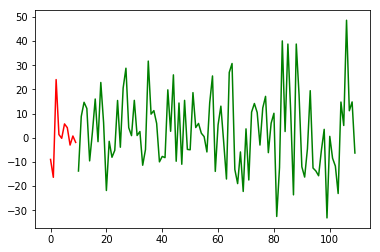

In [15]:
plt.plot([i for i in range(m)],z[0:m],'r')
plt.plot([i for i in range(m,m+ts)],z[m:m+ts],'g')

In [18]:
learning_rate = 0.01

In [19]:
obj = []
W = init_weights([m,1])
U = init_weights([1,1])
b = init_weights([1,1])
dt = tf.Variable(tf.zeros([1,1]),dtype=tf.float32,trainable=False)
features = tf.placeholder(tf.float32,shape = [m+ts,1])
Wdeep = [init_weights([m,n_nodes])]
bdeep = [init_weights([n_nodes,1])]
for i in range(n_layers-2):
    Wdeep.append(init_weights([n_nodes,n_nodes]))
    bdeep.append(init_weights([n_nodes,1]))
bdeep.append(init_weights([m,1]))
Wdeep.append(init_weights([n_nodes,m]))
UT,r,delta = unfolded(features,W,b,U,dt,Wdeep,bdeep)
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(-UT)

In [26]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()
steps = 1
epochs = 10000
with tf.Session() as sess:
    sess.run(init)
    for j in range(epochs):
        ind = 0
        for i in range(steps):
            #print(ind)
            x_curr = next_batch(ind)
            #_,val,delt,d = sess.run([train,UT,delta,dt],feed_dict = {features:x_curr.reshape([10,1])})
            _,val,delt,w = sess.run([train,UT,delta,Wdeep],feed_dict = {features:x_curr.reshape([m+ts,1])})
            obj.append(val[0][0])
            ind = ind + m+ts
        print(val)
    saver.save(sess, "./stock")
    
    

[[-122.33374023]]
[[-121.6534729]]
[[-121.05975342]]
[[-120.49536133]]
[[-119.94580078]]
[[-119.40556335]]
[[-118.86964417]]
[[-118.3377533]]
[[-117.80832672]]
[[-117.28035736]]
[[-116.75375366]]
[[-116.22756958]]
[[-115.70193481]]
[[-115.17638397]]
[[-114.65113831]]
[[-114.12562561]]
[[-113.59999084]]
[[-113.0740509]]
[[-112.54773712]]
[[-112.02114868]]
[[-111.49581909]]
[[-110.97278595]]
[[-110.44949341]]
[[-109.92567444]]
[[-109.40126038]]
[[-108.87628174]]
[[-108.35066223]]
[[-107.82444763]]
[[-107.29812622]]
[[-106.77236938]]
[[-106.24610901]]
[[-105.71914673]]
[[-105.1914978]]
[[-104.66331482]]
[[-104.13423157]]
[[-103.60450745]]
[[-103.07700348]]
[[-102.5542984]]
[[-102.03057098]]
[[-101.50630188]]
[[-100.9811554]]
[[-100.45506287]]
[[-99.92806244]]
[[-99.40032959]]
[[-98.87158966]]
[[-98.34207153]]
[[-97.81147003]]
[[-97.28009033]]
[[-96.74781799]]
[[-96.21452332]]
[[-95.68031311]]
[[-95.14497375]]
[[-94.60874939]]
[[-94.07151794]]
[[-93.53327179]]
[[-92.99398804]]
[[-92.453689

[[ 245.64291382]]
[[ 246.47531128]]
[[ 247.3033905]]
[[ 248.1269989]]
[[ 248.94419861]]
[[ 249.75964355]]
[[ 250.57072449]]
[[ 251.37792969]]
[[ 252.18128967]]
[[ 252.98034668]]
[[ 253.77349854]]
[[ 254.56561279]]
[[ 255.35446167]]
[[ 256.14001465]]
[[ 256.92251587]]
[[ 257.70098877]]
[[ 258.47595215]]
[[ 259.25009155]]
[[ 260.02191162]]
[[ 260.79144287]]
[[ 261.55899048]]
[[ 262.3215332]]
[[ 263.0847168]]
[[ 263.84664917]]
[[ 264.60702515]]
[[ 265.36599731]]
[[ 266.12185669]]
[[ 266.87689209]]
[[ 267.63256836]]
[[ 268.38720703]]
[[ 269.1413269]]
[[ 269.89318848]]
[[ 270.64419556]]
[[ 271.39657593]]
[[ 272.14910889]]
[[ 272.90130615]]
[[ 273.65200806]]
[[ 274.40249634]]
[[ 275.15515137]]
[[ 275.9083252]]
[[ 276.66195679]]
[[ 277.41387939]]
[[ 278.15930176]]
[[ 278.88702393]]
[[ 279.61502075]]
[[ 280.34320068]]
[[ 281.06912231]]
[[ 281.79718018]]
[[ 282.52676392]]
[[ 283.25701904]]
[[ 283.98806763]]
[[ 284.71658325]]
[[ 285.44909668]]
[[ 286.18307495]]
[[ 286.91812134]]
[[ 287.65371704]

[[ 683.31085205]]
[[ 683.84008789]]
[[ 684.37176514]]
[[ 684.89770508]]
[[ 685.42108154]]
[[ 685.94360352]]
[[ 686.46673584]]
[[ 686.98797607]]
[[ 687.51019287]]
[[ 688.03186035]]
[[ 688.5526123]]
[[ 689.07305908]]
[[ 689.59234619]]
[[ 690.11242676]]
[[ 690.62982178]]
[[ 691.14880371]]
[[ 691.66351318]]
[[ 692.18139648]]
[[ 692.69512939]]
[[ 693.20977783]]
[[ 693.72277832]]
[[ 694.23486328]]
[[ 694.74707031]]
[[ 695.25616455]]
[[ 695.7666626]]
[[ 696.27325439]]
[[ 696.78100586]]
[[ 697.2868042]]
[[ 697.79119873]]
[[ 698.29602051]]
[[ 698.79675293]]
[[ 699.29949951]]
[[ 699.79870605]]
[[ 700.29766846]]
[[ 700.796875]]
[[ 701.29193115]]
[[ 701.78826904]]
[[ 702.28216553]]
[[ 702.77246094]]
[[ 703.26531982]]
[[ 703.75494385]]
[[ 704.23126221]]
[[ 704.68865967]]
[[ 705.14129639]]
[[ 705.59185791]]
[[ 706.04223633]]
[[ 706.48931885]]
[[ 706.93676758]]
[[ 707.3807373]]
[[ 707.82299805]]
[[ 708.26135254]]
[[ 708.69854736]]
[[ 709.13555908]]
[[ 709.57141113]]
[[ 710.0032959]]
[[ 710.43548584]]

[[ 827.75299072]]
[[ 828.05413818]]
[[ 828.35437012]]
[[ 828.65350342]]
[[ 828.95489502]]
[[ 829.25579834]]
[[ 829.55926514]]
[[ 829.8583374]]
[[ 830.16064453]]
[[ 830.46276855]]
[[ 830.7666626]]
[[ 831.07128906]]
[[ 831.3772583]]
[[ 831.68457031]]
[[ 831.98968506]]
[[ 832.29711914]]
[[ 832.60748291]]
[[ 832.92181396]]
[[ 833.22967529]]
[[ 833.5435791]]
[[ 833.85443115]]
[[ 834.16931152]]
[[ 834.48486328]]
[[ 834.79949951]]
[[ 835.11633301]]
[[ 835.43023682]]
[[ 835.75146484]]
[[ 836.0690918]]
[[ 836.39001465]]
[[ 836.71282959]]
[[ 837.03118896]]
[[ 837.35845947]]
[[ 837.68103027]]
[[ 838.00500488]]
[[ 838.33276367]]
[[ 838.65911865]]
[[ 838.98632812]]
[[ 839.3145752]]
[[ 839.64581299]]
[[ 839.97442627]]
[[ 840.30621338]]
[[ 840.6395874]]
[[ 840.97033691]]
[[ 841.30627441]]
[[ 841.64117432]]
[[ 841.9755249]]
[[ 842.31011963]]
[[ 842.65093994]]
[[ 842.98736572]]
[[ 843.32653809]]
[[ 843.66723633]]
[[ 844.00817871]]
[[ 844.34710693]]
[[ 844.69006348]]
[[ 845.03393555]]
[[ 845.37658691]]


KeyboardInterrupt: 

In [ ]:
plt.plot(obj,'r')